## Recurrent Neural Networks
In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.

Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)
<img src="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png">

Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)

Let me give you the best explanation of Recurrent Neural Networks that I found on internet: https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s

Now, even though RNNs are quite powerful, they suffer from  **Vanishing gradient problem ** which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: **Long Short Term Networks(LSTM).**

### What is Vanishing Gradient problem?
Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

<img src="https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png">

Source: [Medium](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)

## Long Short Term Memory(LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

Refer above link for deeper insights.

## Components of LSTMs
So the LSTM cell contains the following components
* Forget Gate “f” ( a neural network with sigmoid)
* Candidate layer “C"(a NN with Tanh)
* Input Gate “I” ( a NN with sigmoid )
* Output Gate “O”( a NN with sigmoid)
* Hidden state “H” ( a vector )
* Memory state “C” ( a vector)

* Inputs to the LSTM cell at any step are X<sub>t</sub> (current input) , H<sub>t-1</sub> (previous hidden state ) and C<sub>t-1</sub> (previous memory state).  
* Outputs from the LSTM cell are H<sub>t</sub> (current hidden state ) and C<sub>t</sub> (current memory state)

## Working of gates in LSTMs
First, LSTM cell takes the previous memory state C<sub>t-1</sub> and does element wise multiplication with forget gate (f) to decide if  present memory state C<sub>t</sub>. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

**C<sub>t</sub> = C<sub>t-1</sub> * f<sub>t</sub>**

Calculating the new memory state: 

**C<sub>t</sub> = C<sub>t</sub> + (I<sub>t</sub> * C\`<sub>t</sub>)**

Now, we calculate the output:

**H<sub>t</sub> = tanh(C<sub>t</sub>)**

### Importing Library and Packages

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# Some functions to help out with
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
import os
# fileList = os.listdir("../input")
fileList = os.listdir("data")

In [5]:
companyList = []
for file in fileList:
    companyName = file.split("_")[0]
    if companyName != "all":
        companyList.append(companyName)
print(companyList)

['CVX', 'UTX', 'WMT', 'MMM', 'NKE', 'GS', 'MRK', 'JPM', 'UNH', 'CSCO', 'JNJ', 'IBM', 'TRV', 'PG', 'CAT', 'AAPL', 'KO', 'VZ', 'AABA', 'AMZN', 'AXP', 'INTC', 'PFE', 'XOM', 'HD', 'MSFT', 'MCD', 'DIS', 'GE', 'GOOGL', 'BA']


|Ticker Symbol | Company|
|:---|:---|
|CSCO | Cisco Systems Inc. |
|TRV | Travelers Companies Inc. |
|IBM | International Business Machine Corporation |
|UTX | United Technologies Corporation |
|PFE| Pfizer Inc. |
|JNJ | Johnson and Johnson |
|AXP | American Express Company |
|GS | Goldman Sachs Group Inc. |
|GOOGL | Google Inc. |
|GE | General Electric |
|KO | The Coca Cola Company |
|VZ | Verizon Communications |
|AABA | Altaba Inc. |
|BA | Boeing Co|
|NKE | Nike Inc. |
|CVX | Chevron Corporation |
|AMZN | Amazon Inc. |
|UNH| United Health Group |
|WMT| Walmart Inc. |
|MMM| 3M Co |
|JPM| JP Morgan Chase & Co. |
|DIS| Walt Disney Co |
|CAT| Caterpillar Co |
|MRK| Merck & Co., Inc|
|XOM| Exxon Mobil Corporation |
|MSFT| Microsoft |
|HD| Home Depot Inc |
|INTC| Intel Corporation |
|PG| Procter & Gamble Co |
|AAPL| Apple Inc. |

We pick the tech companies from our list. We import each data and place it in a dictionary with key is its ticker symbol

In [6]:
# First, we get the data
stockList = ["GE", "MSFT", "GOOGL", "AAPL", "AMZN", "IBM", "CSCO"]
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("data/" + i + "_2006-01-01_to_2018-01-01.csv", index_col="Date", parse_dates=["Date"])

We make all prices prior to 2015 as a training set and the rest as test set

In [10]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2015", "Close")

We plot all companies we pick and paint which one is the training set and test set

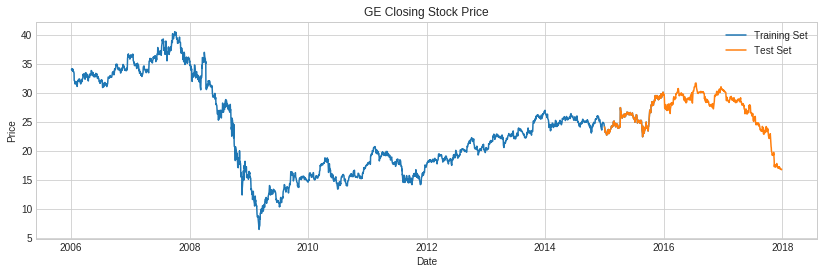

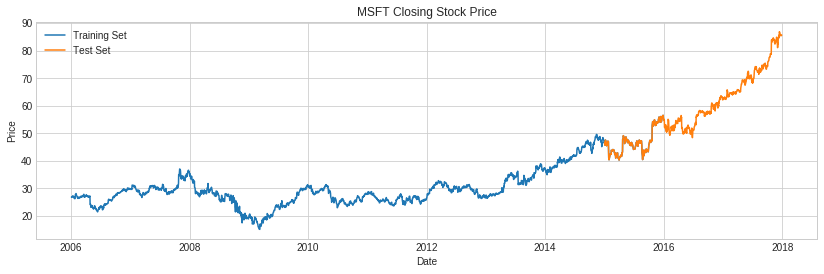

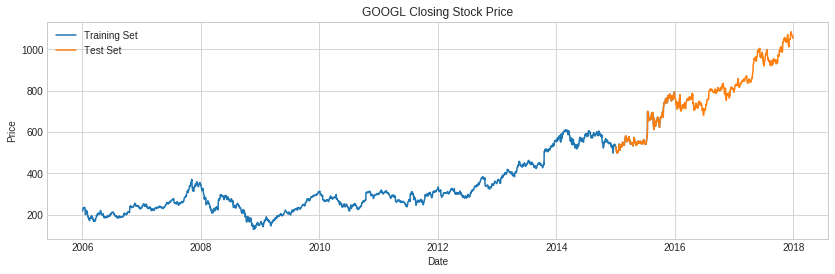

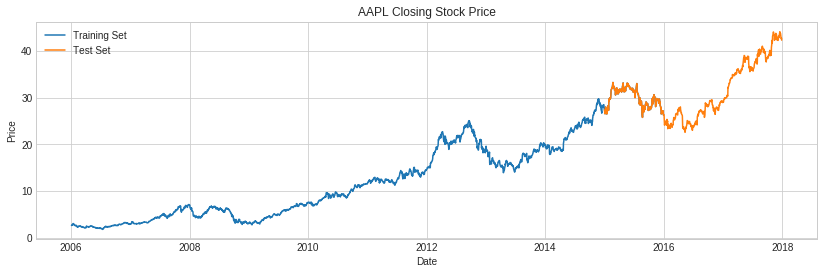

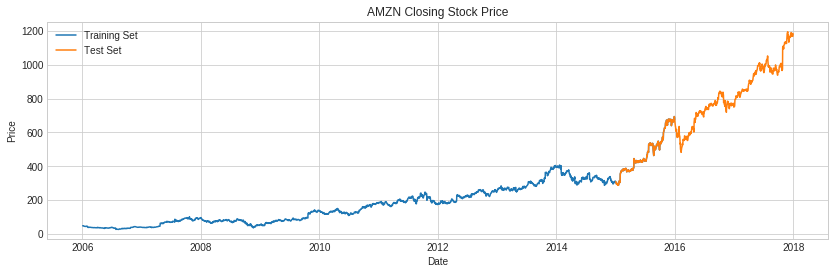

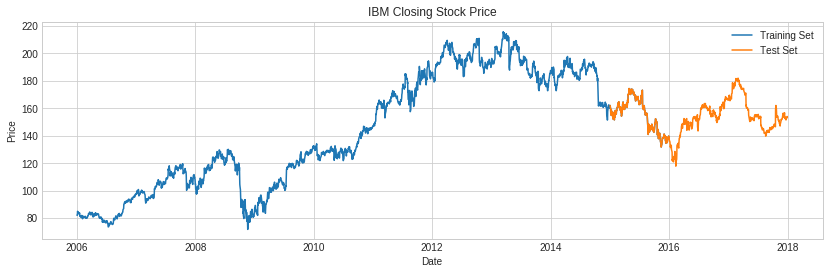

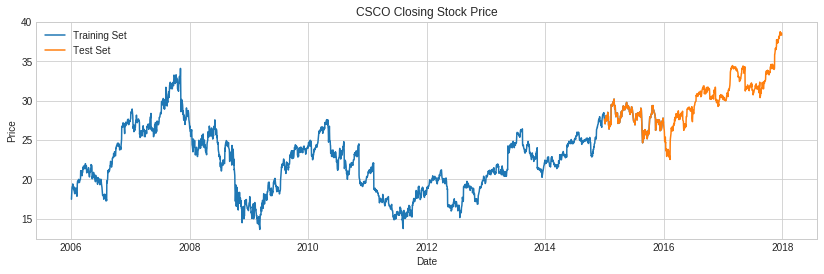

In [15]:
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

We rescale all stock price to zero for the lowest and 1 for the highest. Each of company have their own scale. We make another two dictionary which contain scaled price for each company. One contain train set and another contain test set. 

We also create another dictionary for collecting the scaller. This will be useful when we want to inverse transform our prediction.

In [16]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1

We print the shape of our transformed set. Few company have the more than the other. This over value should be removed so the input will be uniform in term of shape

In [17]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

GE (2517, 1)
MSFT (2517, 1)
GOOGL (2517, 1)
AAPL (2517, 1)
AMZN (2517, 1)
IBM (2517, 1)
CSCO (2517, 1)


GE (755, 1)
MSFT (755, 1)
GOOGL (755, 1)
AAPL (755, 1)
AMZN (755, 1)
IBM (755, 1)
CSCO (755, 1)


We think 60 feature will be enough training.   We prepare shape our test and train set for neural network input

In [31]:
type(transform_train['GE'])

numpy.ndarray

In [36]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,2516):
        X_train.append(transform_train[j][i-60:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 755):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

Check the shape (again) before start training

In [37]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
GE,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
MSFT,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
GOOGL,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
AAPL,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
AMZN,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
IBM,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"
CSCO,"(2456, 60, 1)","(2456,)","(695, 60, 1)","(695,)"


In [20]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Fitting to GE

Epoch 1/10
2456/2456 [==============================] - 9s 4ms/step - loss: 0.0767
Epoch 2/10
2456/2456 [==============================] - 7s 3ms/step - loss: 0.0197
Epoch 3/10
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0312
Epoch 4/10
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0184
Epoch 5/10
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0188
Epoch 6/10
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0191
Epoch 7/10
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0167
Epoch 8/10
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0158
Epoch 9/10
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0143
Epoch 10/10
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0140
Fitting to MSFT
Epoch 1/10
2456/2456 [==============================] - 4

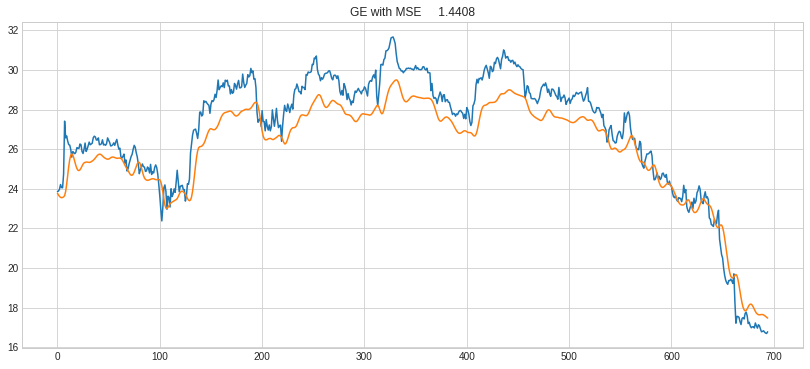

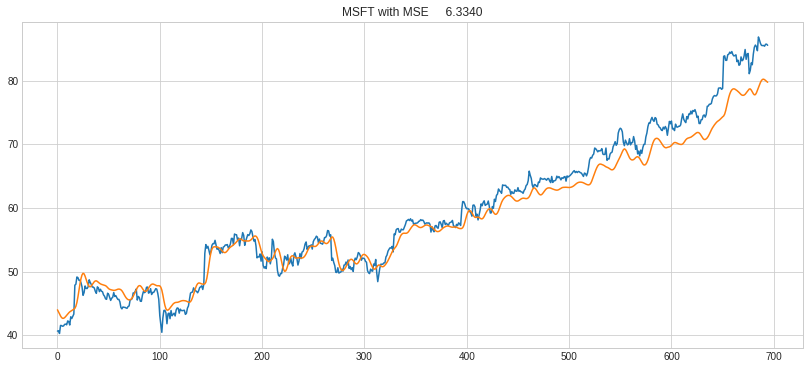

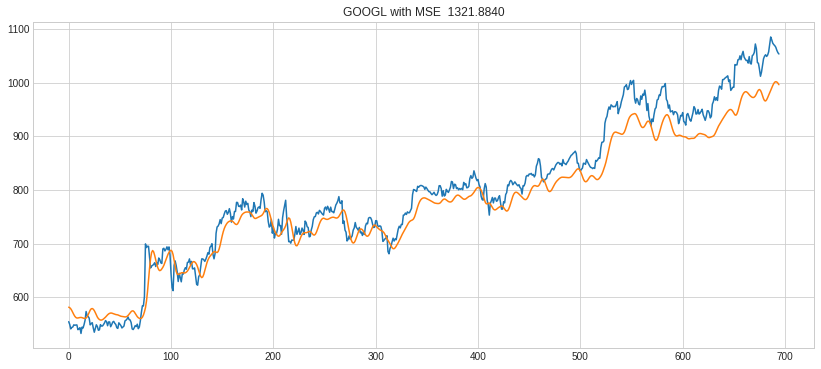

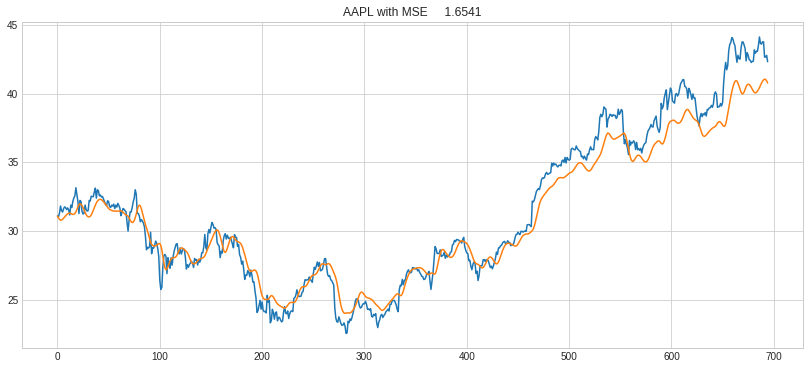

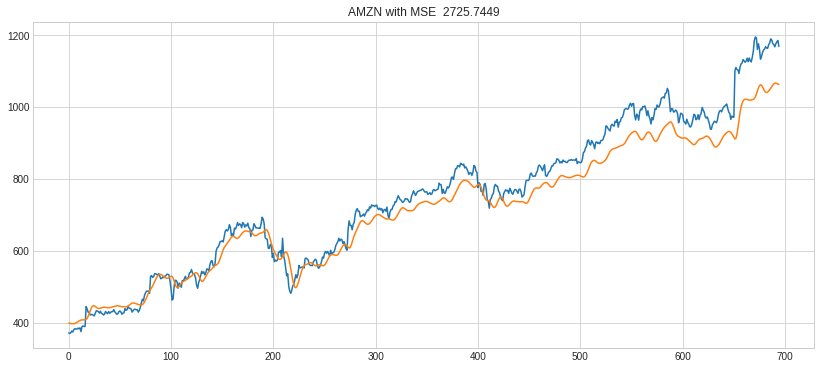

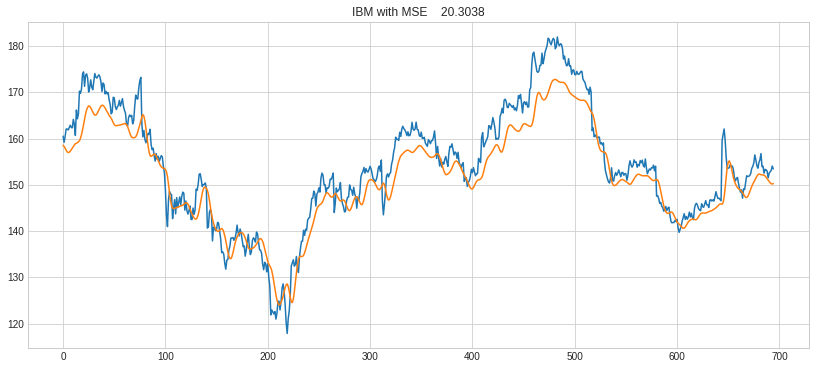

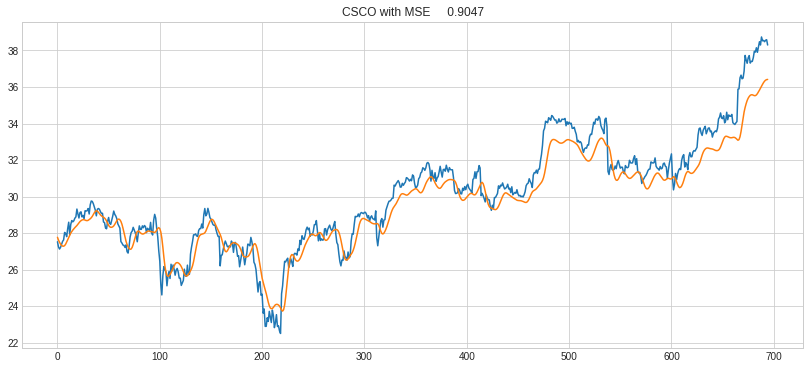

In [21]:
pred_result = {}
for i in stockList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)

We can improve our prediction by introducing shifting/lagging. Essentialy we slide our prediction for a period of time. This is a common practice in signal processing subfield.

When we displace to make our prediction start earlier, we call it lagging. As for consequences, lagged prediction will have last -- equal to how much we displace the prediction -- value equal to NaN. If we lag it by 5 day, then the last 5 day prediction will become NaN. 

When we displace to make our prediction start later, we call it shifting. As for consequenceses, shifted prediction will have first -- equal to how much we displace the prediction -- value equal to NaN. If we shift it by 5 day, then the last 5 day prediction will become NaN.

In [24]:
time_index = df_new["CSCO"]["Test"][60:].index
def lagging(df, lag, time_index):
    df_pred = pd.Series(df["Pred"].reshape(-1))
    df_true = pd.Series(df["True"].reshape(-1))
    
    df_pred_lag = df_pred.shift(lag)
    
    print("MSE without Lag", mean_squared_error(np.array(df_true), np.array(df_pred)))
    print("MSE with Lag 5", mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5])))

    plt.figure(figsize=(14,4))
    plt.title("Prediction without Lag")
    plt.plot(df_true)
    plt.plot(df_pred)

    MSE_lag = mean_squared_error(np.array(df_true[:-5]), np.array(df_pred_lag[:-5]))
    plt.figure(figsize=(14,4))
    plt.title("Prediction with Lag")
    plt.plot(df_true)
    plt.plot(df_pred_lag)


MSE without Lag 20.303789372678192
MSE with Lag 5 13.475793988531478


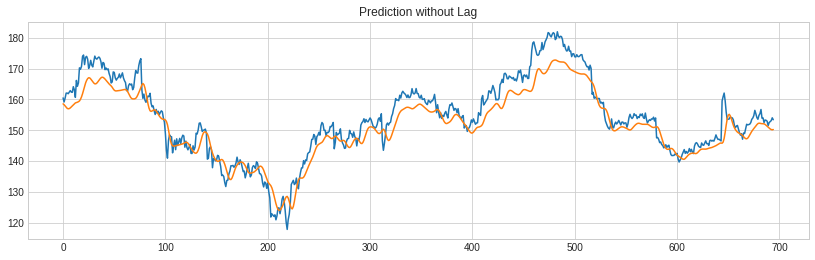

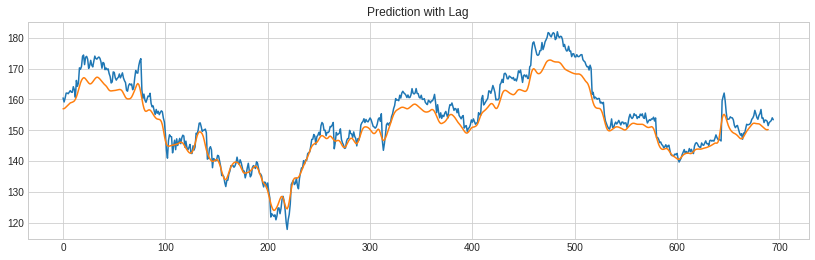

In [25]:
lagging(pred_result["IBM"], -5, time_index)

Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [26]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressorGRU.fit(trainset[i]["X"], trainset[i]["y"],epochs=50,batch_size=150)

Fitting to GE
Epoch 1/50
2456/2456 [==============================] - 8s 3ms/step - loss: 0.0957
Epoch 2/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0330
Epoch 3/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0125
Epoch 4/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 5/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 6/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0033
Epoch 7/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 8/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0028
Epoch 9/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0030
Epoch 10/50
2456/2456 [==============================] - 4s 1ms/step - loss: 0.0029
Epoch 11/50
2456/2456 [==============================] - 3s 1ms/step - loss: 0.0028
Epoch 12/50
2456/2456 [==============================] - 3s 1ms/step - 

2456/2456 [==============================] - 6s 2ms/step - loss: 0.0012
Epoch 49/50
2456/2456 [==============================] - 6s 2ms/step - loss: 0.0013
Epoch 50/50
2456/2456 [==============================] - 6s 2ms/step - loss: 0.0012
Fitting to GOOGL
Epoch 1/50
2456/2456 [==============================] - 6s 2ms/step - loss: 0.0013
Epoch 2/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 3/50
2456/2456 [==============================] - 8s 3ms/step - loss: 0.0012
Epoch 4/50
2456/2456 [==============================] - 10s 4ms/step - loss: 0.0013
Epoch 5/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 6/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0013
Epoch 7/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 8/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 9/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.

2456/2456 [==============================] - 6s 2ms/step - loss: 0.0014
Epoch 46/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 47/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0016
Epoch 48/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0015
Epoch 49/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0015
Epoch 50/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0014
Fitting to AMZN
Epoch 1/50
2456/2456 [==============================] - 6s 2ms/step - loss: 9.5882e-04
Epoch 2/50
2456/2456 [==============================] - 5s 2ms/step - loss: 9.8797e-04
Epoch 3/50
2456/2456 [==============================] - 10s 4ms/step - loss: 9.8108e-04
Epoch 4/50
2456/2456 [==============================] - 5s 2ms/step - loss: 9.7869e-04
Epoch 5/50
2456/2456 [==============================] - 4s 2ms/step - loss: 9.0461e-04
Epoch 6/50
2456/2456 [==============================] - 

2456/2456 [==============================] - 5s 2ms/step - loss: 0.0017
Epoch 41/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 42/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 43/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0017
Epoch 44/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 45/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0017
Epoch 46/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0018
Epoch 47/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 48/50
2456/2456 [==============================] - 4s 2ms/step - loss: 0.0017
Epoch 49/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0016
Epoch 50/50
2456/2456 [==============================] - 5s 2ms/step - loss: 0.0018
Fitting to CSCO
Epoch 1/50
2456/2456 [==============================] - 4s 2ms/step - lo

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

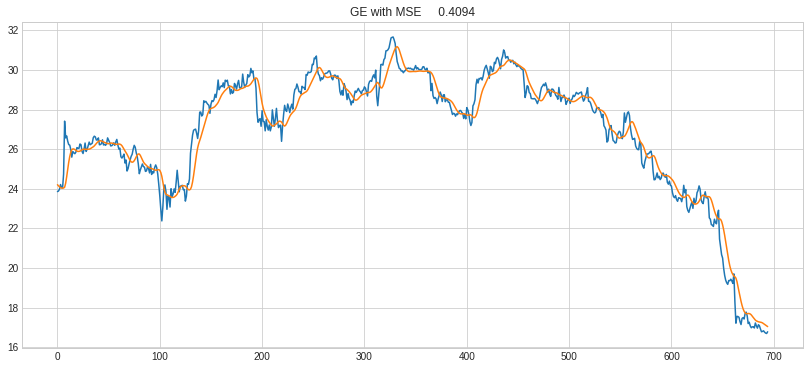

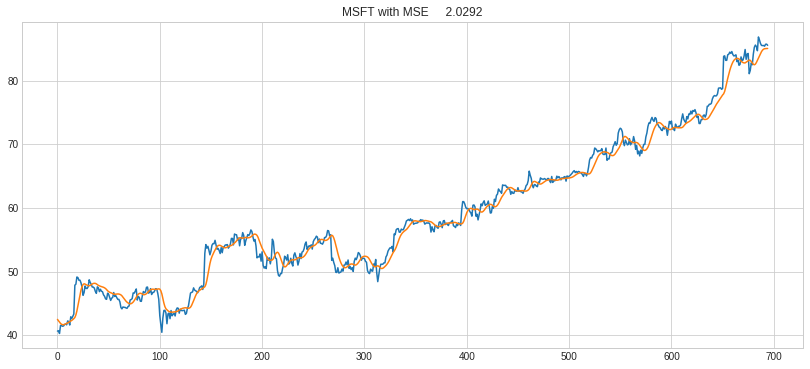

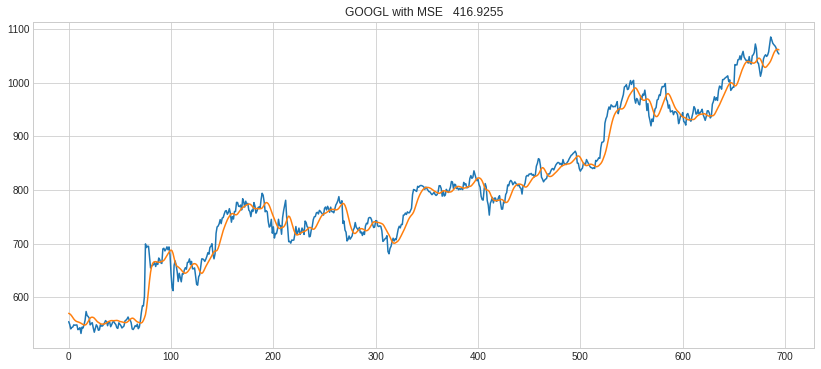

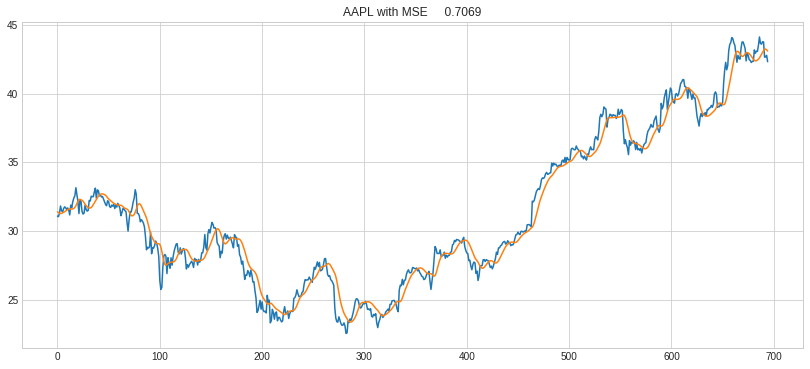

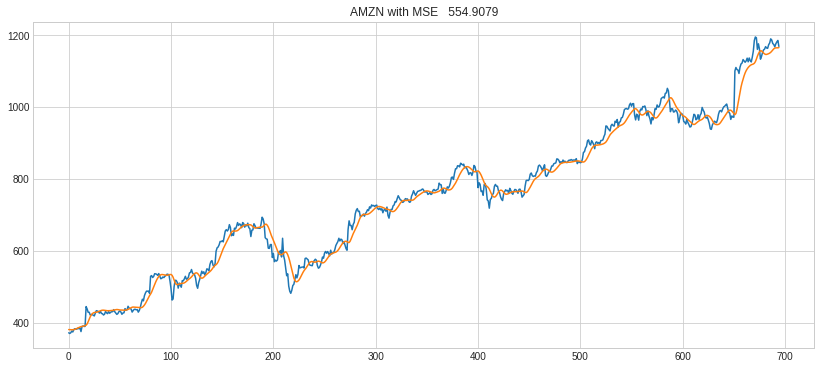

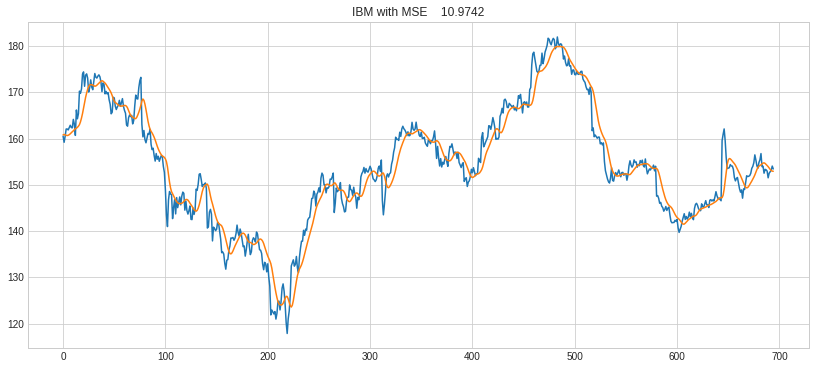

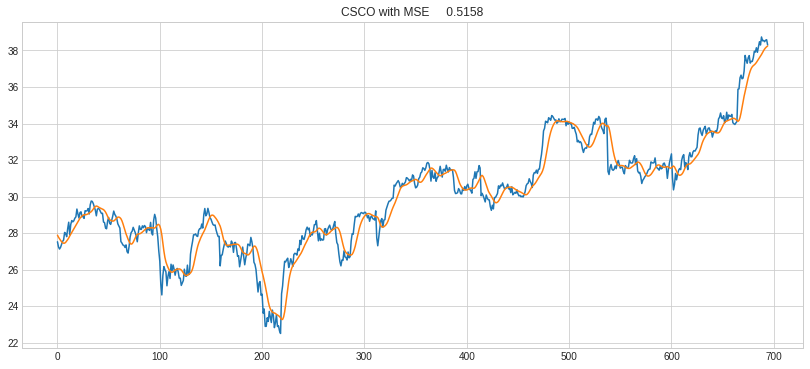

In [27]:
for i in stockList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressorGRU.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)

#### Takeaway

* When stock price is high, the MSE tend to get high but from the graph it predict as good as the rest. 

* LSTM and GRU done great job forecasting pricing of each company. Compared to non-neural network time series forecasting, neural network done superb job but with caveat. Neural network is only good at predicting  but not extracting properties of time series data.  Statistical relation cannot be explained by neural network. This maybe fine for someone who does cannot change the course of future data but for someone who need to make decision how future data is going need many information not just forecasting. 

* Combining time-series/signal analysis with neural network architecture will yield a good result with good interpretability